In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
#load dataset
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#checking for missing data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

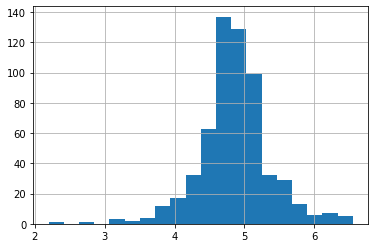

In [6]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [11]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
#df['TotalIncome_log'].hist(bins=20)

In [14]:
# filling missing data
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [19]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 0.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 3016.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 0.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 480.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 0.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 0.0]],
      dtype=object)

In [20]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who take loan by Gender:
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

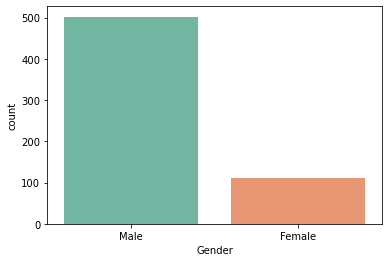

In [21]:
print('Number of people who take loan by Gender:')
print(df['Gender'].value_counts())
sns.countplot(data = df, x = 'Gender', palette=  'Set2')

Number of people who take loan by Marital Status:
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

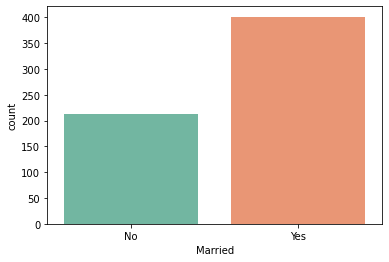

In [22]:
print('Number of people who take loan by Marital Status:')
print(df['Married'].value_counts())
sns.countplot(data = df, x = 'Married', palette=  'Set2')

Number of people who take loan by Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

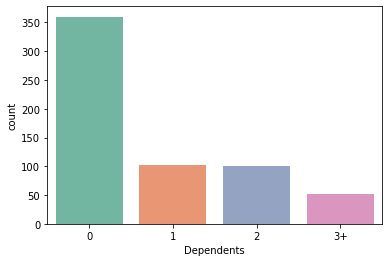

In [23]:
print('Number of people who take loan by Dependents:')
print(df['Dependents'].value_counts())
sns.countplot(data = df, x = 'Dependents', palette=  'Set2')

Number of people who take loan by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

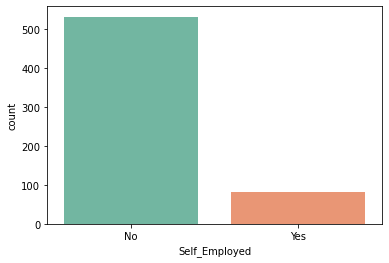

In [24]:
print('Number of people who take loan by Self_Employed:')
print(df['Self_Employed'].value_counts())
sns.countplot(data = df, x = 'Self_Employed', palette=  'Set2')

In [33]:

from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# label encoding 
from sklearn.preprocessing import LabelEncoder

In [30]:
x[0:12]

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.857444178729353,
        0.0],
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0, 4.852030263919617,
        3016.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.189654742026425,
        0.0],
       ['Male', 'Yes', '0', 'Not Graduate', 360.0, 1.0,
        4.787491742782046, 4716.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.948759890378168,
        0.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 5.58724865840025,
        8392.0],
       ['Male', 'Yes', '0', 'Not Graduate', 360.0, 1.0,
        4.553876891600541, 3032.0],
       ['Male', 'Yes', '3+', 'Graduate', 360.0, 0.0, 5.062595033026967,
        5008.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 5.123963979403259,
        3052.0],
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0, 5.855071922202427,
        21936.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 4.248495242049359,
        1400.0],
       ['Male', 'Yes', '2', 'Gradu

In [35]:
LabelEncoder_X = LabelEncoder()

for a in range(0,5):
    X_train[:,a] = LabelEncoder_X.fit_transform(X_train[:, a])
    X_train[:, 7] = LabelEncoder_X.fit_transform(X_train[:, 7])
    
X_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 119],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 158],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 63],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 0],
       [0, 1, 0, ..., 1.0, 4.857444178729353, 0],
       [1, 1, 0, ..., 1.0, 4.857444178729353, 0]], dtype=object)

In [37]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [38]:
for a in range(0,5):
    X_test[:,a] = LabelEncoder_X.fit_transform(X_test[:, a])
    X_test[:, 7] = LabelEncoder_X.fit_transform(X_test[:, 7])
    
X_test

array([[1, 1, 0, 0, 3, 1.0, 5.429345628954441, 0],
       [1, 1, 0, 0, 3, 1.0, 4.867534450455582, 0],
       [1, 1, 2, 0, 3, 1.0, 5.062595033026967, 12],
       [0, 0, 0, 0, 3, 1.0, 4.2626798770413155, 0],
       [1, 0, 0, 0, 3, 1.0, 4.248495242049359, 0],
       [1, 1, 1, 0, 3, 1.0, 4.672828834461906, 36],
       [1, 1, 2, 0, 3, 1.0, 4.787491742782046, 0],
       [1, 1, 0, 0, 3, 1.0, 4.189654742026425, 0],
       [1, 1, 3, 1, 3, 1.0, 5.153291594497779, 15],
       [1, 1, 1, 0, 3, 1.0, 4.700480365792417, 47],
       [1, 1, 2, 0, 3, 0.0, 4.276666119016055, 0],
       [1, 1, 0, 0, 3, 1.0, 5.030437921392435, 35],
       [1, 1, 3, 1, 4, 1.0, 4.543294782270004, 4],
       [1, 1, 2, 1, 3, 1.0, 4.857444178729353, 16],
       [1, 1, 2, 0, 3, 1.0, 4.477336814478207, 51],
       [1, 1, 0, 0, 2, 1.0, 4.553876891600541, 48],
       [1, 0, 0, 0, 3, 1.0, 4.07753744390572, 0],
       [1, 0, 0, 0, 3, 1.0, 5.017279836814924, 55],
       [1, 1, 1, 0, 3, 1.0, 4.941642422609304, 22],
       [1, 1, 0, 0, 1

In [39]:
y_test = LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [40]:
# Standardisation
from sklearn.preprocessing import StandardScaler

sx = StandardScaler()

X_train = sx.fit_transform(X_train)
X_test = sx.fit_transform(X_test)

In [41]:
# model selection
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print('Accuracy score is', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy score is 0.7398373983739838


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
# Support Vector Machine
from sklearn import svm
clf = svm.SVC(kernel= 'rbf')
clf.fit(X_train, y_train)



SVC()

In [44]:
from sklearn import metrics
y_pred = clf.predict(X_test)

print('Accuracy score is', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy score is 0.7967479674796748


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [46]:
from sklearn import metrics
y_pred = nb_clf.predict(X_test)

print('Accuracy score is', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy score is 0.7804878048780488


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

df_clf = DecisionTreeClassifier()
df_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
from sklearn import metrics
y_pred = df_clf.predict(X_test)

print('Accuracy score is', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy score is 0.6666666666666666


array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [49]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
from sklearn import metrics
y_pred = kn_clf.predict(X_test)

print('Accuracy score is', metrics.accuracy_score(y_pred, y_test))

y_pred

Accuracy score is 0.7967479674796748


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Both SVM and Knn has highest accuracy score of 79.67